## Import Library

In [158]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Convolution2D, AveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

## Data preparing

In [50]:
for dirname, _, filenames in os.walk('D:\CNN\Cars_data'):
    print(os.path.join(dirname))


D:\CNN\Cars_data
D:\CNN\Cars_data\test
D:\CNN\Cars_data\test\Audi
D:\CNN\Cars_data\test\Hyundai Creta
D:\CNN\Cars_data\test\Mahindra Scorpio
D:\CNN\Cars_data\test\Rolls Royce
D:\CNN\Cars_data\test\Swift
D:\CNN\Cars_data\test\Tata Safari
D:\CNN\Cars_data\test\Toyota Innova
D:\CNN\Cars_data\train
D:\CNN\Cars_data\train\Audi
D:\CNN\Cars_data\train\Hyundai Creta
D:\CNN\Cars_data\train\Mahindra Scorpio
D:\CNN\Cars_data\train\Rolls Royce
D:\CNN\Cars_data\train\Swift
D:\CNN\Cars_data\train\Tata Safari
D:\CNN\Cars_data\train\Toyota Innova


## Data processing 

In [159]:
# Normalization 
IMAGE_SIZE = 150

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'D:/CNN/Cars_data/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [53]:
labels = list(train_generator.class_indices.keys())
labels

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [54]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
test_generator = test_datagen.flow_from_directory(
        'D:/CNN/Cars_data/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 813 images belonging to 7 classes.


## Training model

In [148]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(150, 150, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 73, 73, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 36, 36, 64)      

In [149]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

In [150]:
earlystoping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience = 2, min_lr = 1e-10)
checkpoint = ModelCheckpoint('best_model.h5py', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [151]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    callbacks=[earlystoping, reduce_lr, checkpoint],
    shuffle = True
)

Epoch 1/50
105/105 [==============================] - ETA: 0s - loss: 2.0103 - accuracy: 0.2524
Epoch 1: val_loss improved from inf to 1.80348, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 58s 540ms/step - loss: 2.0103 - accuracy: 0.2524 - val_loss: 1.8035 - val_accuracy: 0.3407 - lr: 0.0010
Epoch 2/50
105/105 [==============================] - ETA: 0s - loss: 1.7214 - accuracy: 0.3550
Epoch 2: val_loss improved from 1.80348 to 1.67815, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 55s 523ms/step - loss: 1.7214 - accuracy: 0.3550 - val_loss: 1.6781 - val_accuracy: 0.3727 - lr: 0.0010
Epoch 3/50
105/105 [==============================] - ETA: 0s - loss: 1.6200 - accuracy: 0.4016
Epoch 3: val_loss improved from 1.67815 to 1.57314, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 54s 518ms/step - loss: 1.6200 - accuracy: 0.4016 - val_loss: 1.5731 - val_accuracy: 0.4428 - lr: 0.0010
Epoch 4/50
105/105 [==============================] - ETA: 0s - loss: 1.5283 - accuracy: 0.4415
Epoch 4: val_loss improved from 1.57314 to 1.51016, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 55s 526ms/step - loss: 1.5283 - accuracy: 0.4415 - val_loss: 1.5102 - val_accuracy: 0.4613 - lr: 0.0010
Epoch 5/50
105/105 [==============================] - ETA: 0s - loss: 1.4075 - accuracy: 0.4985
Epoch 5: val_loss improved from 1.51016 to 1.42377, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 53s 500ms/step - loss: 1.4075 - accuracy: 0.4985 - val_loss: 1.4238 - val_accuracy: 0.4932 - lr: 0.0010
Epoch 6/50
105/105 [==============================] - ETA: 0s - loss: 1.3187 - accuracy: 0.5313
Epoch 6: val_loss improved from 1.42377 to 1.35123, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 52s 499ms/step - loss: 1.3187 - accuracy: 0.5313 - val_loss: 1.3512 - val_accuracy: 0.5228 - lr: 0.0010
Epoch 7/50
105/105 [==============================] - ETA: 0s - loss: 1.2186 - accuracy: 0.5737
Epoch 7: val_loss improved from 1.35123 to 1.27286, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 51s 488ms/step - loss: 1.2186 - accuracy: 0.5737 - val_loss: 1.2729 - val_accuracy: 0.5449 - lr: 0.0010
Epoch 8/50
105/105 [==============================] - ETA: 0s - loss: 1.1134 - accuracy: 0.6113
Epoch 8: val_loss improved from 1.27286 to 1.22475, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 52s 497ms/step - loss: 1.1134 - accuracy: 0.6113 - val_loss: 1.2247 - val_accuracy: 0.5806 - lr: 0.0010
Epoch 9/50
105/105 [==============================] - ETA: 0s - loss: 1.0626 - accuracy: 0.6334
Epoch 9: val_loss improved from 1.22475 to 1.16579, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 52s 498ms/step - loss: 1.0626 - accuracy: 0.6334 - val_loss: 1.1658 - val_accuracy: 0.6064 - lr: 0.0010
Epoch 10/50
105/105 [==============================] - ETA: 0s - loss: 0.9866 - accuracy: 0.6665
Epoch 10: val_loss did not improve from 1.16579
105/105 [==============================] - 51s 487ms/step - loss: 0.9866 - accuracy: 0.6665 - val_loss: 1.1681 - val_accuracy: 0.6015 - lr: 0.0010
Epoch 11/50
105/105 [==============================] - ETA: 0s - loss: 0.9165 - accuracy: 0.6924
Epoch 11: val_loss improved from 1.16579 to 1.14441, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 52s 498ms/step - loss: 0.9165 - accuracy: 0.6924 - val_loss: 1.1444 - val_accuracy: 0.6224 - lr: 0.0010
Epoch 12/50
105/105 [==============================] - ETA: 0s - loss: 0.8830 - accuracy: 0.6921
Epoch 12: val_loss improved from 1.14441 to 1.11198, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 51s 486ms/step - loss: 0.8830 - accuracy: 0.6921 - val_loss: 1.1120 - val_accuracy: 0.6458 - lr: 0.0010
Epoch 13/50
105/105 [==============================] - ETA: 0s - loss: 0.8429 - accuracy: 0.7178
Epoch 13: val_loss did not improve from 1.11198
105/105 [==============================] - 51s 489ms/step - loss: 0.8429 - accuracy: 0.7178 - val_loss: 1.1190 - val_accuracy: 0.6371 - lr: 0.0010
Epoch 14/50
105/105 [==============================] - ETA: 0s - loss: 0.7883 - accuracy: 0.7321
Epoch 14: val_loss improved from 1.11198 to 1.09612, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 52s 495ms/step - loss: 0.7883 - accuracy: 0.7321 - val_loss: 1.0961 - val_accuracy: 0.6298 - lr: 0.0010
Epoch 15/50
105/105 [==============================] - ETA: 0s - loss: 0.7468 - accuracy: 0.7530
Epoch 15: val_loss improved from 1.09612 to 1.07121, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 52s 493ms/step - loss: 0.7468 - accuracy: 0.7530 - val_loss: 1.0712 - val_accuracy: 0.6445 - lr: 0.0010
Epoch 16/50
105/105 [==============================] - ETA: 0s - loss: 0.7127 - accuracy: 0.7488
Epoch 16: val_loss improved from 1.07121 to 1.04785, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 56s 532ms/step - loss: 0.7127 - accuracy: 0.7488 - val_loss: 1.0478 - val_accuracy: 0.6556 - lr: 0.0010
Epoch 17/50
105/105 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.7640
Epoch 17: val_loss did not improve from 1.04785
105/105 [==============================] - 51s 483ms/step - loss: 0.6900 - accuracy: 0.7640 - val_loss: 1.0551 - val_accuracy: 0.6494 - lr: 0.0010
Epoch 18/50
105/105 [==============================] - ETA: 0s - loss: 0.6425 - accuracy: 0.7867
Epoch 18: val_loss did not improve from 1.04785
105/105 [==============================] - 50s 477ms/step - loss: 0.6425 - accuracy: 0.7867 - val_loss: 1.1057 - val_accuracy: 0.6568 - lr: 0.0010
Epoch 19/50
105/105 [==============================] - ETA: 0s - loss: 0.5652 - accuracy: 0.8126
Epoch 19: val_loss improved from 1.04785 to 1.02862, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 50s 480ms/step - loss: 0.5652 - accuracy: 0.8126 - val_loss: 1.0286 - val_accuracy: 0.6765 - lr: 1.0000e-04
Epoch 20/50
105/105 [==============================] - ETA: 0s - loss: 0.5465 - accuracy: 0.8201
Epoch 20: val_loss did not improve from 1.02862
105/105 [==============================] - 52s 492ms/step - loss: 0.5465 - accuracy: 0.8201 - val_loss: 1.0331 - val_accuracy: 0.6704 - lr: 1.0000e-04
Epoch 21/50
105/105 [==============================] - ETA: 0s - loss: 0.5307 - accuracy: 0.8210
Epoch 21: val_loss did not improve from 1.02862
105/105 [==============================] - 52s 498ms/step - loss: 0.5307 - accuracy: 0.8210 - val_loss: 1.0555 - val_accuracy: 0.6667 - lr: 1.0000e-04
Epoch 22/50
105/105 [==============================] - ETA: 0s - loss: 0.5113 - accuracy: 0.8326
Epoch 22: val_loss improved from 1.02862 to 1.00613, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 53s 506ms/step - loss: 0.5113 - accuracy: 0.8326 - val_loss: 1.0061 - val_accuracy: 0.6802 - lr: 1.0000e-05
Epoch 23/50
105/105 [==============================] - ETA: 0s - loss: 0.5132 - accuracy: 0.8264
Epoch 23: val_loss improved from 1.00613 to 1.00103, saving model to best_model.h5py
INFO:tensorflow:Assets written to: best_model.h5py\assets


INFO:tensorflow:Assets written to: best_model.h5py\assets


105/105 [==============================] - 53s 502ms/step - loss: 0.5132 - accuracy: 0.8264 - val_loss: 1.0010 - val_accuracy: 0.6937 - lr: 1.0000e-05
Epoch 24/50
105/105 [==============================] - ETA: 0s - loss: 0.5156 - accuracy: 0.8350
Epoch 24: val_loss did not improve from 1.00103
105/105 [==============================] - 52s 496ms/step - loss: 0.5156 - accuracy: 0.8350 - val_loss: 1.0251 - val_accuracy: 0.6716 - lr: 1.0000e-05
Epoch 25/50
105/105 [==============================] - ETA: 0s - loss: 0.5130 - accuracy: 0.8273
Epoch 25: val_loss did not improve from 1.00103
105/105 [==============================] - 50s 480ms/step - loss: 0.5130 - accuracy: 0.8273 - val_loss: 1.0246 - val_accuracy: 0.6790 - lr: 1.0000e-05
Epoch 26/50
105/105 [==============================] - ETA: 0s - loss: 0.5212 - accuracy: 0.8198
Epoch 26: val_loss did not improve from 1.00103
105/105 [==============================] - 50s 472ms/step - loss: 0.5212 - accuracy: 0.8198 - val_loss: 1.0699 -

## Model evaluation

In [152]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

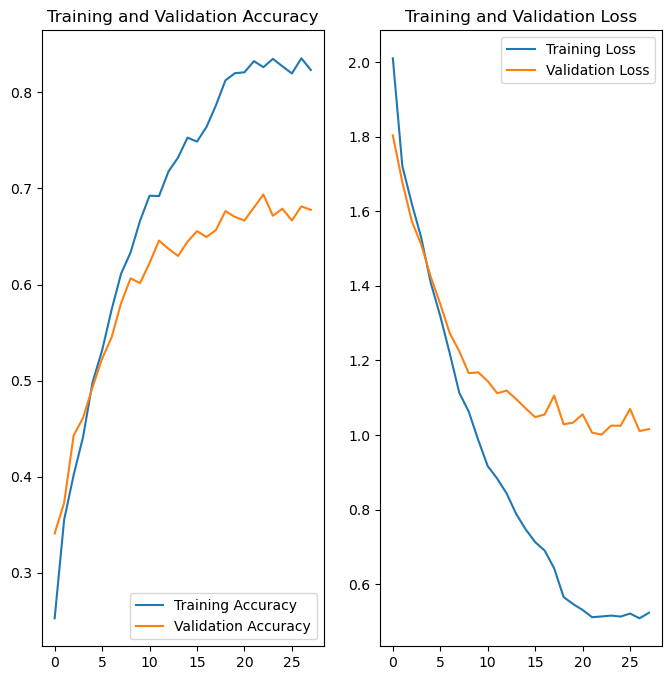

In [153]:
import matplotlib.pyplot as plt
EPOCHS = 28

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing model in test data

In [160]:
def predict(model, img):
    # Chuyển đổi hình ảnh thành mảng
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # Mở rộng kích thước của mảng để phù hợp với đầu vào của mô hình
    img_array = tf.expand_dims(img_array, 0)

    # Dự đoán nhãn của hình ảnh
    predictions = model.predict(img_array)

    # Lấy nhãn được dự đoán và độ tin cậy
    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


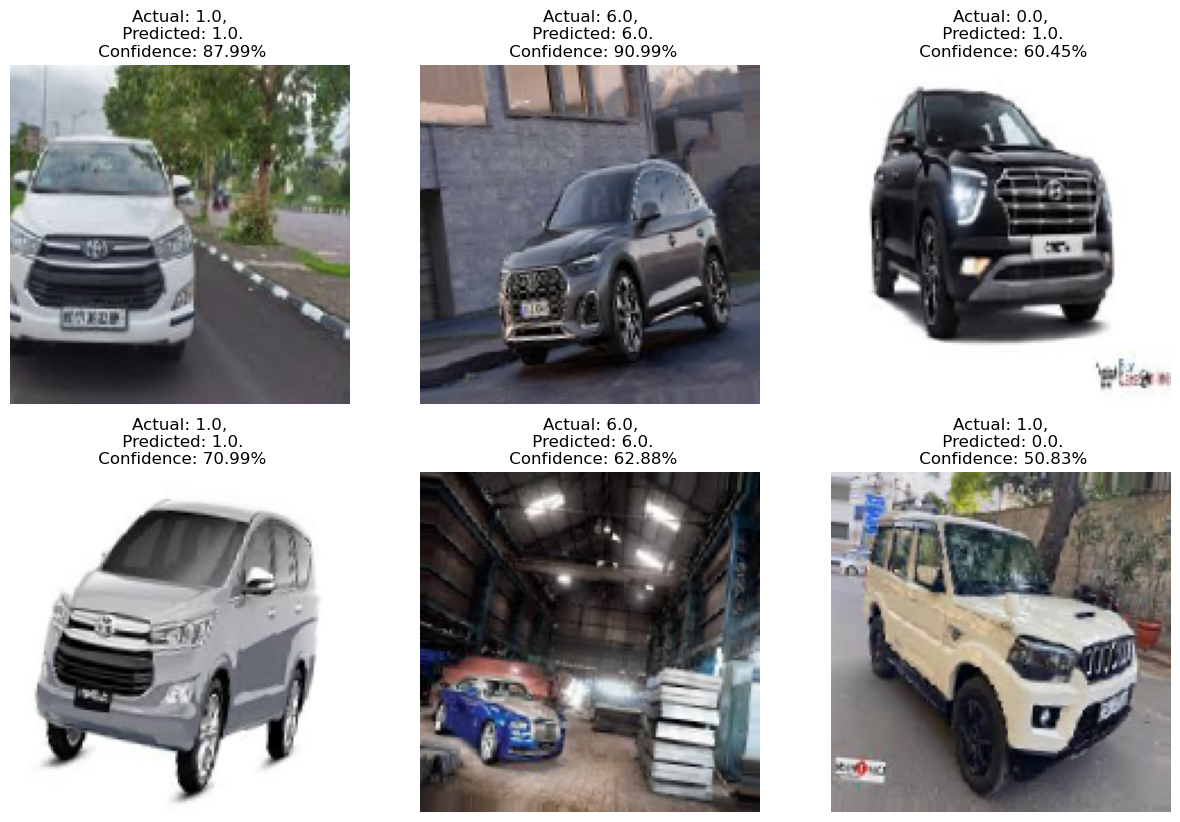

In [161]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break